In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [20]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])   
               
#normal distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)                
print(dist_02.shape)                 

(500, 2)
(500, 2)


# plot data


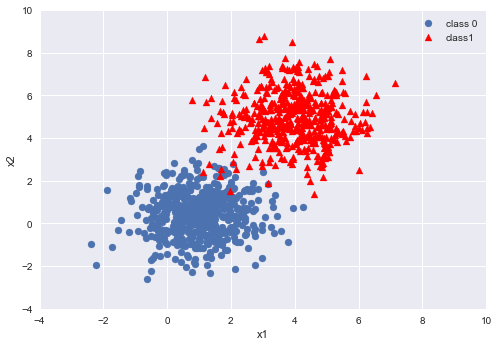

In [26]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='class1')

plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [27]:
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [28]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500,-1]=1.0

In [30]:
np.random.shuffle(data)
print(data[:10])

[[ 4.18132808  5.46118702  0.        ]
 [-0.29479861 -0.36454811  0.        ]
 [ 3.57249456  3.04611811  0.        ]
 [ 3.17658725  3.52755238  0.        ]
 [ 3.1029833   6.37851952  0.        ]
 [ 3.67706487  5.98873594  0.        ]
 [ 2.67286591  4.89807878  0.        ]
 [-0.19867696  0.82905452  0.        ]
 [ 1.38667906  0.39794612  0.        ]
 [ 2.62490107  4.75332417  0.        ]]


In [32]:
split=int(0.8*data.shape[0])

In [33]:
X_train=data[:split,:-1]
X_test=data[split:,:-1]
Y_train=data[:split,:-1]

Y_test=data[split:,:-1]


In [34]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800, 2) (200, 2)


# logistic regression


In [35]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [57]:
def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1.0*hx))

In [37]:
def error(x,y,w,b):
 err=0.0  
 for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]+np.log2(hx)+(1-y[i]*np.log2(1-hx))
 return err/x.shape[0]       

In [38]:
def get_grad(x,y,w,b):
    grad_b=0.0 
    grad_w=np.zeros(w.shape)
    for i in range(x.shape[0]):
       hx=hypothesis(x[i],w,b)
       grad_b+=(y[i]-hx)
       grad_w+=(y[i]-hx)*x[i]
    return [grad_x/x.shape[0],grad_b/x.shape[0]]

In [51]:
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err=error(x,y,w,b)
    [grad_w,grad_b]=get_grad(x,y,w,b)
    w+=learning_rate+grad_w
    b+=learning_rate+grad_b
    return err,w,b


In [52]:
W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()

In [ ]:
loss=[]

In [54]:
for i in range(1000):
    l,w,b=gradient_ascent(X_train,Y_train,W,b,learning_rate=0.1)
    loss.append(1)

NameError: name 'sigmoid' is not defined

In [55]:
plt.plot(loss)
plt.show()

NameError: name 'loss' is not defined

In [58]:
print(w,b)

[0.27741764 1.53730137] 1.2070320222354314


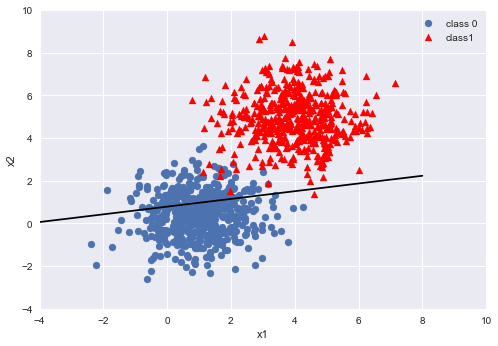

In [59]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='class1')

plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
x=np.linspace(-4,8,10)
y=(w[0]*x+b)/w[1]
plt.plot(x,y,color='k')
plt.legend()
plt.show()